In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
sweep_id = "c26f4nnm"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")

summary_list = [] 
config_list = [] 
name_list = [] 
for run in sweep.runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # # run.config is the input metrics.
    # # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if k in ('architecture', 'view')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       

summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

In [ ]:
view_order

['encoded134', 'encoded1234', 'encoded124']

In [ ]:
view_order=sorted(sorted(all_df['view'].unique()), key=len)
arch_order = sorted(all_df['architecture'].unique())

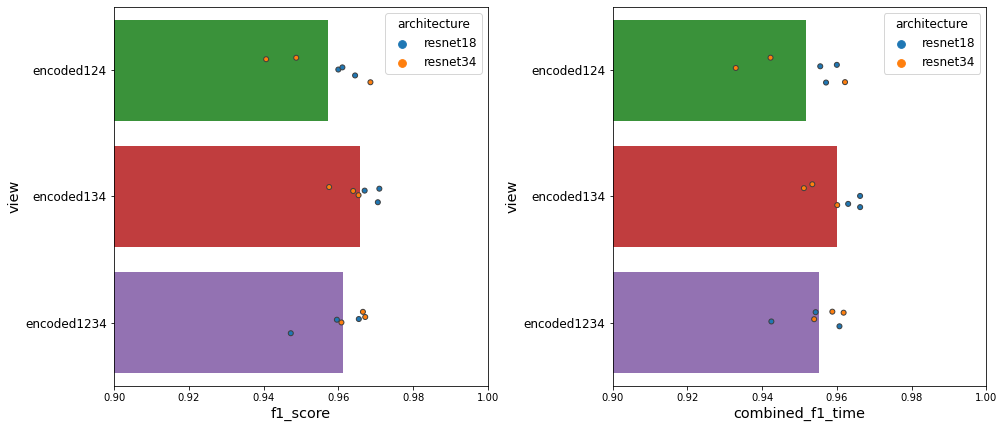

In [ ]:
plt.rc('font', size=10) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y='view', x='f1_score', data=all_df, errwidth=0, order=view_order, palette=sns.color_palette()[2:])
sns.stripplot(y='view', x='f1_score', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
plt.yticks(fontsize='large')
plt.legend(frameon=True, title='architecture', fontsize='large', title_fontsize='large')

plt.subplot(1, 2, 2)
sns.barplot(y='view', x='combined_f1_time', data=all_df, errwidth=0, order=view_order, palette=sns.color_palette()[2:])
sns.stripplot(y='view', x='combined_f1_time', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
plt.yticks(fontsize='large')
plt.legend(frameon=True, title='architecture', fontsize='large', title_fontsize='large')
fig.tight_layout()
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='x-large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='x-large')

#fig.savefig('../figs/glitches/03_baseline_scratch_view.pdf', dpi=600)